# Explore data augmentations

This notebook will be used to test different data augmentation strategies. In your config file, you can modify the augmentations by adding `data_augmentation_options`. For example, I would like to add a random RGB to gray transform with a probability of 0.2:
```
data_augmentation_options {
    random_rgb_to_gray {
    probability: 0.2
    }
```

A complete list of augmentation is provided the [`preprocessor.proto` file of the Tf Object Detection API](https://github.com/tensorflow/models/blob/master/research/object_detection/protos/preprocessor.proto).

### Helper functions

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

In [8]:
def recenter_image(image):
    # ssd preprocessing
    image += [123.68, 116.779, 103.939]
    return image

def display_instances(image, bboxes, classes):
    image = recenter_image(image)
    w, h, _ = image.shape
    # resize the bboxes
    bboxes[:, [0, 2]] *= w
    bboxes[:, [1, 3]] *= h
    
    f, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(image.astype(np.uint8))
    for bb, cl in zip(bboxes, classes):
        y1, x1, y2, x2 = bb
        rec = Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', edgecolor='r', linewidth=2)
        ax.add_patch(rec)
    plt.show()

def display_batch(batch):
    # get images, bboxes and classes
    batched_images = batch[0]['image'].numpy()
    batched_bboxes = batch[1]['groundtruth_boxes'].numpy()
    batched_classes = batch[1]['groundtruth_classes'].numpy()
    num_bboxes = batch[1]['num_groundtruth_boxes'].numpy()
    batch_size = batched_images.shape[0]
    for idx in range(batch_size):
        display_instances(batched_images[idx, ...], 
                          batched_bboxes[idx, :num_bboxes[idx], :],
                          batched_classes[idx, ...])

### Display augmentations

In [9]:
from utils import get_train_input

In [10]:
train_dataset = get_train_input("./pipeline_new.config")

INFO:tensorflow:Reading unweighted datasets: ['/home/levin/workspace/carnd/tf_obj_detection_api/data/train/segment-11379226583756500423_6230_810_6250_810_with_camera_labels.tfrecord', '/home/levin/workspace/carnd/tf_obj_detection_api/data/train/segment-10584247114982259878_490_000_510_000_with_camera_labels.tfrecord', '/home/levin/workspace/carnd/tf_obj_detection_api/data/train/segment-10723911392655396041_860_000_880_000_with_camera_labels.tfrecord', '/home/levin/workspace/carnd/tf_obj_detection_api/data/train/segment-11454085070345530663_1905_000_1925_000_with_camera_labels.tfrecord', '/home/levin/workspace/carnd/tf_obj_detection_api/data/train/segment-10876852935525353526_1640_000_1660_000_with_camera_labels.tfrecord', '/home/levin/workspace/carnd/tf_obj_detection_api/data/train/segment-10226164909075980558_180_000_200_000_with_camera_labels.tfrecord', '/home/levin/workspace/carnd/tf_obj_detection_api/data/train/segment-11392401368700458296_1086_429_1106_429_with_camera_labels.tfrec

INFO:tensorflow:Reading record datasets for input file: ['/home/levin/workspace/carnd/tf_obj_detection_api/data/train/segment-11379226583756500423_6230_810_6250_810_with_camera_labels.tfrecord', '/home/levin/workspace/carnd/tf_obj_detection_api/data/train/segment-10584247114982259878_490_000_510_000_with_camera_labels.tfrecord', '/home/levin/workspace/carnd/tf_obj_detection_api/data/train/segment-10723911392655396041_860_000_880_000_with_camera_labels.tfrecord', '/home/levin/workspace/carnd/tf_obj_detection_api/data/train/segment-11454085070345530663_1905_000_1925_000_with_camera_labels.tfrecord', '/home/levin/workspace/carnd/tf_obj_detection_api/data/train/segment-10876852935525353526_1640_000_1660_000_with_camera_labels.tfrecord', '/home/levin/workspace/carnd/tf_obj_detection_api/data/train/segment-10226164909075980558_180_000_200_000_with_camera_labels.tfrecord', '/home/levin/workspace/carnd/tf_obj_detection_api/data/train/segment-11392401368700458296_1086_429_1106_429_with_camera_l

INFO:tensorflow:Number of filenames to read: 80


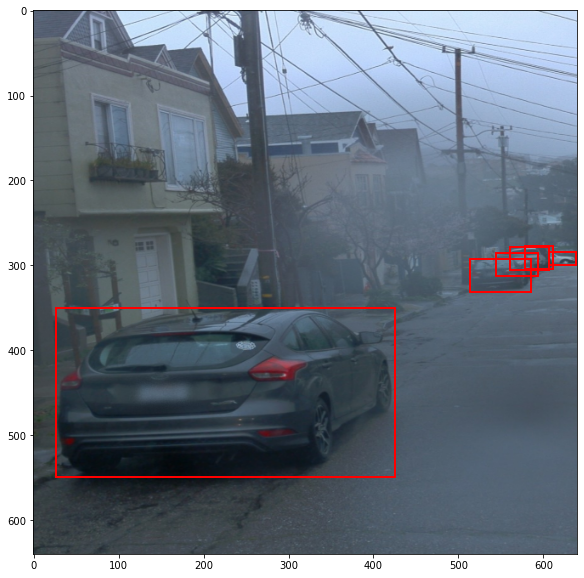

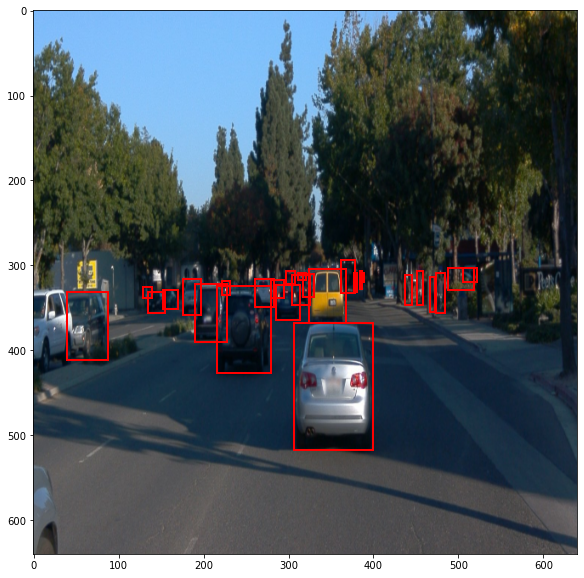

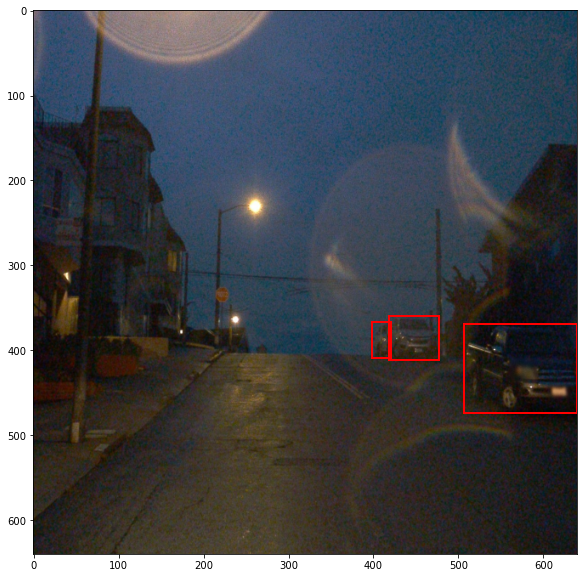

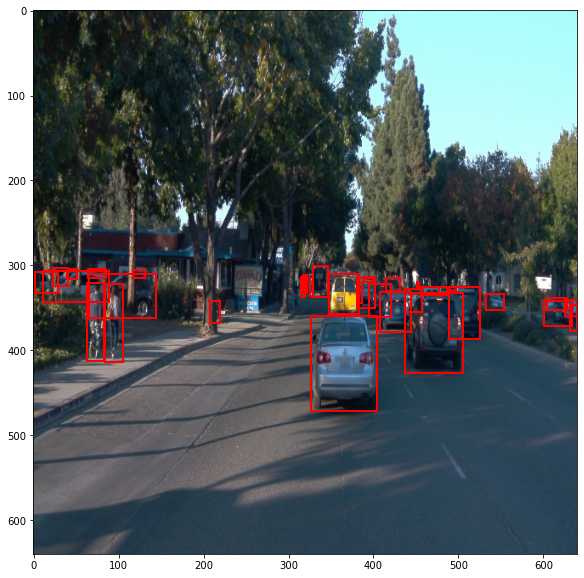

In [11]:
%matplotlib inline

for batch in train_dataset.take(1):
    display_batch(batch)